# 2. Example: Pytorch Recurrent Neural Network


In [1]:
import torch
from dabench import data, vector, model
import matplotlib.pyplot as plt
import numpy as np

### Part I: Define torch model


In [2]:
n_vars = 3
n_hidden = 24
out_size = 3

In [3]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

rnn = RNN(n_vars, n_hidden, out_size)


In [4]:
loss_fn = torch.nn.MSELoss()
learning_rate = 0.001
optimiser = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

### Part II: Generate data and train

In [5]:
l63 = data.Lorenz63()

In [6]:
l63.generate(n_steps=1000)

In [7]:
train = torch.Tensor(l63.values[:600])
val = torch.Tensor(l63.values[600:800])
test = torch.Tensor(l63.values[800:])

/tmp/ipykernel_29761/2310192355.py:1: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1664817698971/work/torch/csrc/utils/tensor_numpy.cpp:172.)
  train = torch.Tensor(l63.values[:600])


In [8]:
import time
import math

num_epochs = 20000
print_every = 10


for t in range(num_epochs):
    all_train_pred = []
    all_val_pred = []
    
    # Init hidden state
    hidden = rnn.initHidden()
    
    # Clear stored grad
    optimiser.zero_grad()
    
    # Train iter
    output = train[None, 0]
    all_train_pred.append(output.view(-1))
    for i in range(train.shape[0]-1):
        # Predict
        output, hidden = rnn(output, hidden)
        all_train_pred.append(output.view(-1))
        
    all_train_pred_tensor = torch.cat(all_train_pred, dim=-1)

    # Calc loss
    loss = loss_fn(all_train_pred_tensor, train.flatten())

    # Validation: predict and calc loss
    output = val[None, 0]
    all_val_pred.append(output.view(-1))
    for j in range(val.shape[0]-1):
        output, hidden = rnn(output, hidden)
        all_val_pred.append(output.view(-1))
    all_val_pred_tensor = torch.cat(all_val_pred, dim=-1)
    val_loss = loss_fn(all_val_pred_tensor, val.flatten())

    # Backward pass
    loss.backward()
    
    # Update params
    optimiser.step()
    
    if t % print_every == 0:
        print('Epoch: {}, Train Loss: {}, Val Loss: {}'.format(t, loss.item(), val_loss.item()))


Epoch: 0, Train Loss: 260.5774230957031, Val Loss: 275.74798583984375
Epoch: 10, Train Loss: 257.43634033203125, Val Loss: 272.6009521484375
Epoch: 20, Train Loss: 254.823486328125, Val Loss: 269.98712158203125
Epoch: 30, Train Loss: 247.67745971679688, Val Loss: 262.7999572753906
Epoch: 40, Train Loss: 209.36207580566406, Val Loss: 222.70486450195312
Epoch: 50, Train Loss: 236.9672393798828, Val Loss: 251.8906707763672
Epoch: 60, Train Loss: 239.63528442382812, Val Loss: 254.6790313720703
Epoch: 70, Train Loss: 239.65716552734375, Val Loss: 254.72830200195312
Epoch: 80, Train Loss: 238.8712615966797, Val Loss: 253.94874572753906
Epoch: 90, Train Loss: 237.6984405517578, Val Loss: 252.774658203125
Epoch: 100, Train Loss: 236.24191284179688, Val Loss: 251.31263732910156
Epoch: 110, Train Loss: 234.49258422851562, Val Loss: 249.5540313720703
Epoch: 120, Train Loss: 232.3767547607422, Val Loss: 247.42405700683594
Epoch: 130, Train Loss: 229.75022888183594, Val Loss: 244.77587890625
Epoch:

Epoch: 1160, Train Loss: 70.89834594726562, Val Loss: 89.10425567626953
Epoch: 1170, Train Loss: 70.76298522949219, Val Loss: 89.09507751464844
Epoch: 1180, Train Loss: 70.6232681274414, Val Loss: 89.08516693115234
Epoch: 1190, Train Loss: 70.47944641113281, Val Loss: 89.07435607910156
Epoch: 1200, Train Loss: 70.33204650878906, Val Loss: 89.06253814697266
Epoch: 1210, Train Loss: 70.18202209472656, Val Loss: 89.04940795898438
Epoch: 1220, Train Loss: 70.03083038330078, Val Loss: 89.03478240966797
Epoch: 1230, Train Loss: 69.88064575195312, Val Loss: 89.01828002929688
Epoch: 1240, Train Loss: 69.734375, Val Loss: 88.99951934814453
Epoch: 1250, Train Loss: 69.59558868408203, Val Loss: 88.97813415527344
Epoch: 1260, Train Loss: 69.46826934814453, Val Loss: 88.95372772216797
Epoch: 1270, Train Loss: 69.35604095458984, Val Loss: 88.92606353759766
Epoch: 1280, Train Loss: 69.26118469238281, Val Loss: 88.89517211914062
Epoch: 1290, Train Loss: 69.18395233154297, Val Loss: 88.86146545410156
E

Epoch: 2310, Train Loss: 67.99075317382812, Val Loss: 88.27070617675781
Epoch: 2320, Train Loss: 67.94529724121094, Val Loss: 88.2564926147461
Epoch: 2330, Train Loss: 67.89674377441406, Val Loss: 88.24082946777344
Epoch: 2340, Train Loss: 67.84412384033203, Val Loss: 88.22319030761719
Epoch: 2350, Train Loss: 67.78598022460938, Val Loss: 88.20293426513672
Epoch: 2360, Train Loss: 67.72016906738281, Val Loss: 88.17900848388672
Epoch: 2370, Train Loss: 67.64315795898438, Val Loss: 88.14984130859375
Epoch: 2380, Train Loss: 67.54864501953125, Val Loss: 88.11257934570312
Epoch: 2390, Train Loss: 67.42384338378906, Val Loss: 88.0615463256836
Epoch: 2400, Train Loss: 67.23748016357422, Val Loss: 87.98391723632812
Epoch: 2410, Train Loss: 66.87943267822266, Val Loss: 87.84208679199219
Epoch: 2420, Train Loss: 65.07962799072266, Val Loss: 87.25938415527344
Epoch: 2430, Train Loss: 69.53978729248047, Val Loss: 87.84905242919922
Epoch: 2440, Train Loss: 71.54510498046875, Val Loss: 87.792938232

KeyboardInterrupt: 

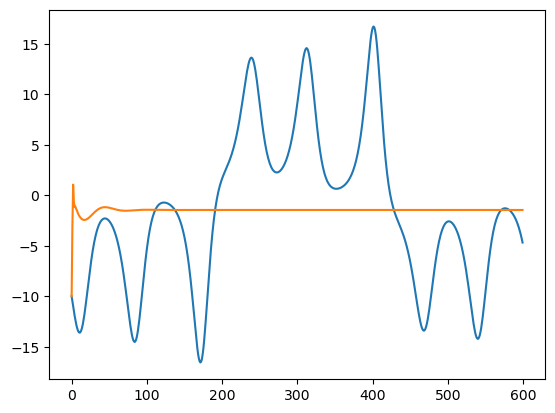

In [11]:
plt.plot(train[:,0].detach().numpy())
plt.plot(all_train_pred_tensor.detach().numpy().reshape(-1, 3)[:,0])

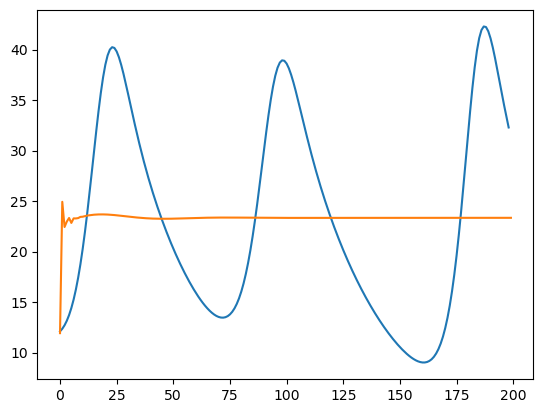

In [12]:
plt.plot(val[1:,2].detach().numpy())
plt.plot(all_val_pred_tensor.detach().numpy().reshape(-1, 3)[:,2])

### Part III: Create dabench model object

In [13]:
class RNN_Model(model.Model):
    def forecast(self, state_vec):
        new_vals, new_hidden = rnn.forward(torch.Tensor(state_vec.xi)[None,:], torch.tensor(state_vec.hidden))
        
        new_vec = vector.StateVector(values = new_vals.detach().numpy())
        new_vec.hidden = new_hidden.detach().numpy()
        
        return new_vec

### Part IV: Forecast


In [14]:
state_vec = vector.StateVector(values = np.array(all_val_pred_tensor.detach().numpy().reshape(-1, 3)))


In [15]:
state_vec.hidden = hidden.detach().numpy()

In [16]:
rnn_model = RNN_Model()

In [17]:
new_state_vec = state_vec
state_vec_list = [state_vec]
for i in range(test.shape[0]-1):
    new_state_vec = rnn_model.forecast(new_state_vec)
    state_vec_list.append(new_state_vec)

In [18]:
vals_list = [sv.xi for sv in state_vec_list]

In [19]:
forecast_vals_test = np.array(vals_list)

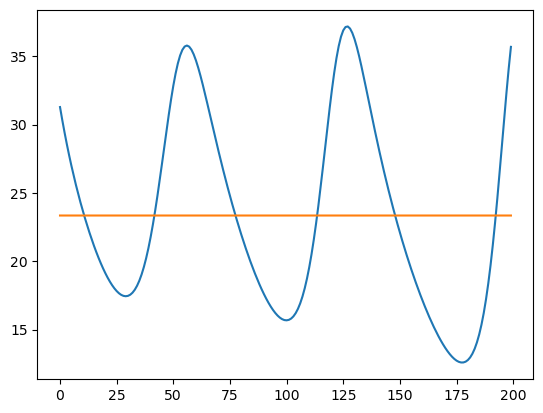

In [20]:
plt.plot(test[:,2].detach().numpy())
plt.plot(forecast_vals_test[:,2])